In [94]:
import os
import yaml
import torch as pt
import matplotlib.pyplot as plt
from latent_diffusion.models import VQVAE
import numpy as np
from torchvision.utils import make_grid
from torchvision.io import read_image

In [2]:
with open("configs/coco17.yaml", encoding="utf-8") as f:
    cfg = yaml.safe_load(f)


In [ ]:
model = VQVAE(cfg).to(cfg["trainer"]["device"])


In [ ]:
checkpoint = pt.load("model_checkpoint_r56.pth", weights_only=True)
model.load_state_dict(checkpoint['model_state_dict'])

In [7]:
model.eval()

VQVAE(
  (encoder): Encoder(
    (in_conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (layers): ModuleDict(
      (DownBlock_0): ModuleDict(
        (resblock_0): ModuleDict(
          (resblock_0_0): ResBlock(
            (tr_conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn_tr): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (layers): Sequential(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU(inplace=True)
              (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
              (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
          )
          (resblock_0_1): ResBlock(
            (tr_conv): Conv2d(32, 32

In [8]:
codebook = model.vq.codebook

In [9]:
codebook.shape

torch.Size([128, 256])

In [103]:
img = read_image("apple.jpg")

In [104]:
img = img/255.0

In [105]:
img = img.unsqueeze(0).to(cfg["trainer"]["device"])

In [106]:
x_, cd, cl, cdl, rl, pl, _ = model(img)

In [109]:
grid = x_.squeeze(0).detach().permute((1,2,0)).cpu().numpy()

tensor([[[[-0.0497, -0.0642, -0.0531,  ..., -0.0743, -0.0203, -0.0172],
          [ 0.0212,  0.0569,  0.0775,  ...,  0.3494,  0.2873,  0.2600],
          [ 0.2658,  0.1765,  0.0572,  ..., -0.1873, -0.0275,  0.0342],
          ...,
          [-0.0351, -0.0324, -0.0263,  ..., -0.0207, -0.0323, -0.0095],
          [-0.0496, -0.0303, -0.0370,  ..., -0.0366, -0.0345, -0.0507],
          [-0.0867, -0.0664, -0.0681,  ..., -0.0315, -0.0841, -0.0805]],

         [[-0.0119, -0.0148, -0.0202,  ..., -0.0798, -0.0081, -0.0116],
          [ 0.0193,  0.0560,  0.0724,  ...,  0.3604,  0.2928,  0.2672],
          [ 0.2703,  0.1815,  0.0630,  ..., -0.1761, -0.0274,  0.0235],
          ...,
          [-0.0247,  0.0047, -0.0080,  ..., -0.0157, -0.0178, -0.0160],
          [-0.0273, -0.0257, -0.0142,  ..., -0.0166, -0.0188, -0.0080],
          [-0.0097, -0.0170, -0.0232,  ..., -0.0421, -0.0287, -0.0344]],

         [[-0.0069, -0.0105, -0.0378,  ..., -0.0302, -0.0183, -0.0578],
          [-0.0427, -0.0536, -

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.030678801..1.0756322].


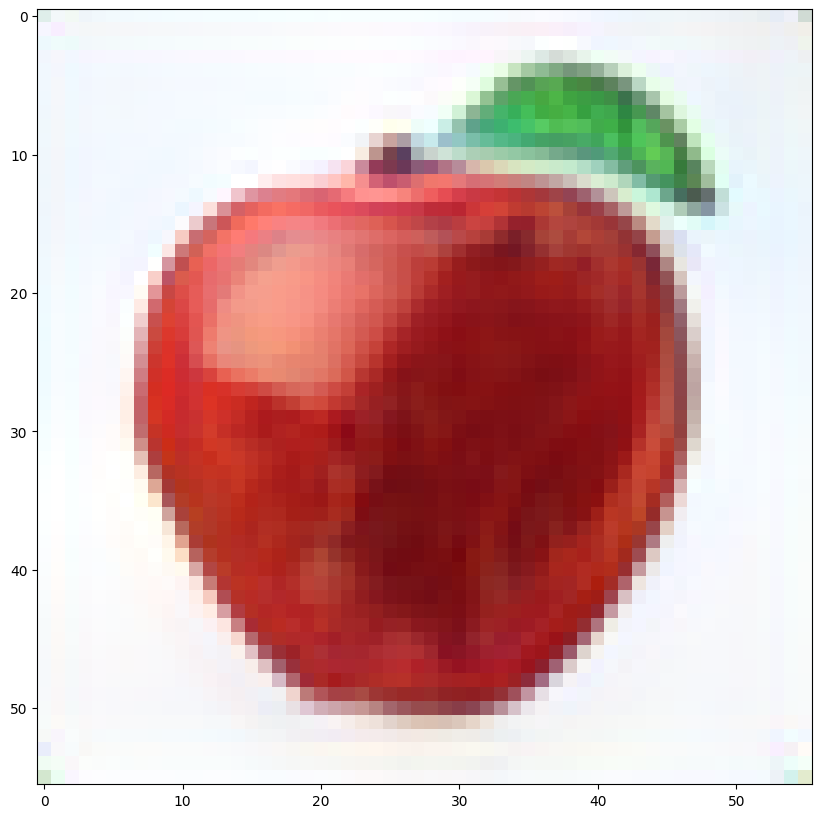

In [110]:
f = plt.figure(figsize=(10,15))
plt.imshow(grid)

torch.Size([1, 256, 14, 14])

In [81]:
grid.min()

0.0

In [1]:
from diffusers.models import UNet2DConditionModel

In [2]:
?UNet2DConditionModel

Init signature:
UNet2DConditionModel(
    sample_size: Optional[int] = None,
    in_channels: int = 4,
    out_channels: int = 4,
    center_input_sample: bool = False,
    flip_sin_to_cos: bool = True,
    freq_shift: int = 0,
    down_block_types: Tuple[str] = ('CrossAttnDownBlock2D', 'CrossAttnDownBlock2D', 'CrossAttnDownBlock2D', 'DownBlock2D'),
    mid_block_type: Optional[str] = 'UNetMidBlock2DCrossAttn',
    up_block_types: Tuple[str] = ('UpBlock2D', 'CrossAttnUpBlock2D', 'CrossAttnUpBlock2D', 'CrossAttnUpBlock2D'),
    only_cross_attention: Union[bool, Tuple[bool]] = False,
    block_out_channels: Tuple[int] = (320, 640, 1280, 1280),
    layers_per_block: Union[int, Tuple[int]] = 2,
    downsample_padding: int = 1,
    mid_block_scale_factor: float = 1,
    dropout: float = 0.0,
    act_fn: str = 'silu',
    norm_num_groups: Optional[int] = 32,
    norm_eps: float = 1e-05,
    cross_attention_dim: Union[int, Tuple[int]] = 1280,
    transformer_layers_per_block: Union[int, Tuple